a)         Implement Particle Swarm Optimization Technique in Python (Hard coding)

In [1]:
#HARD CODING OF PSO
import numpy as np

# Objective function to be minimized
def objective_function(x):
    return x[0]**2 + x[1]**2  # Example: Minimize x^2 + y^2

def particle_swarm_optimization(objective_function, num_particles=30, num_dimensions=2, max_iterations=100, inertia_weight=0.7, cognitive_weight=1.5, social_weight=1.5):
    # Initialize particles
    particles_position = np.random.rand(num_particles, num_dimensions) * 10 - 5  # Random positions within a range (-5, 5)
    particles_velocity = np.random.rand(num_particles, num_dimensions) * 2 - 1  # Random velocities within a range (-1, 1)
    personal_best_positions = particles_position.copy()
    personal_best_values = np.array([objective_function(p) for p in personal_best_positions])

    # Find the global best position
    global_best_index = np.argmin(personal_best_values)
    global_best_position = personal_best_positions[global_best_index]
    global_best_value = personal_best_values[global_best_index]

    # Main optimization loop
    for iteration in range(max_iterations):
        for i in range(num_particles):
            # Update velocity
            inertia_term = inertia_weight * particles_velocity[i]
            cognitive_term = cognitive_weight * np.random.rand() * (personal_best_positions[i] - particles_position[i])
            social_term = social_weight * np.random.rand() * (global_best_position - particles_position[i])
            particles_velocity[i] = inertia_term + cognitive_term + social_term

            # Update position
            particles_position[i] = particles_position[i] + particles_velocity[i]

            # Clip positions to stay within bounds (-5, 5)
            particles_position[i] = np.clip(particles_position[i], -5, 5)

            # Update personal best
            current_value = objective_function(particles_position[i])
            if current_value < personal_best_values[i]:
                personal_best_values[i] = current_value
                personal_best_positions[i] = particles_position[i]

                # Update global best if needed
                if current_value < global_best_value:
                    global_best_value = current_value
                    global_best_position = particles_position[i]

        print(f"Iteration {iteration + 1}: Best Value = {global_best_value}, Best Position = {global_best_position}")

    return global_best_position, global_best_value

if __name__ == "__main__":
    # Example usage
    best_position, best_value = particle_swarm_optimization(objective_function)
    print(f"Optimal Solution: {best_position}")
    print(f"Optimal Value: {best_value}")


Iteration 1: Best Value = 0.1337201873675476, Best Position = [-0.03839822 -0.36365611]
Iteration 2: Best Value = 0.052632363352611164, Best Position = [ 0.11476624 -0.19864811]
Iteration 3: Best Value = 0.052632363352611164, Best Position = [-0.41302378 -2.20833241]
Iteration 4: Best Value = 0.052632363352611164, Best Position = [-0.70717328 -3.32837562]
Iteration 5: Best Value = 0.052632363352611164, Best Position = [-0.17954935 -1.31932375]
Iteration 6: Best Value = 0.052632363352611164, Best Position = [0.39897083 0.88352752]
Iteration 7: Best Value = 0.052632363352611164, Best Position = [0.62420949 1.74117655]
Iteration 8: Best Value = 0.01336469160356809, Best Position = [0.02733829 0.1123268 ]
Iteration 9: Best Value = 0.01336469160356809, Best Position = [-0.46426412 -1.53471045]
Iteration 10: Best Value = 0.01336469160356809, Best Position = [-0.46210907 -1.52749029]
Iteration 11: Best Value = 0.004910933778753669, Best Position = [0.06913074 0.01148368]
Iteration 12: Best Va

b)         Apply PSO to solve the Travelling Sale Person problem (Hard coding

In [2]:
import numpy as np

def calculate_distance(city1, city2):
    return np.linalg.norm(np.array(city1) - np.array(city2))

def total_distance(tour, distance_matrix):
    total_dist = 0
    for i in range(len(tour) - 1):
        total_dist += distance_matrix[tour[i]][tour[i + 1]]
    total_dist += distance_matrix[tour[-1]][tour[0]]  # Return to the starting city
    return total_dist

def initialize_particles(num_particles, num_cities):
    return np.array([np.random.permutation(num_cities) for _ in range(num_particles)])

def update_velocity(velocity, inertia_weight, personal_best, global_best, position, c1, c2):
    r1, r2 = np.random.rand(), np.random.rand()
    cognitive_component = c1 * r1 * (personal_best - position)
    social_component = c2 * r2 * (global_best - position)
    new_velocity = inertia_weight * velocity + cognitive_component + social_component
    return new_velocity

def particle_swarm_optimization(num_particles, num_cities, max_iterations, c1, c2, inertia_weight, distance_matrix):
    # Initialization
    particles = initialize_particles(num_particles, num_cities)
    velocities = np.zeros_like(particles)
    personal_best_positions = particles.copy()
    personal_best_values = np.array([total_distance(p, distance_matrix) for p in particles])
    global_best_index = np.argmin(personal_best_values)
    global_best_position = personal_best_positions[global_best_index, :].copy()
    global_best_value = personal_best_values[global_best_index]

    # Track all the tours and distances at each iteration
    all_tours = [global_best_position.copy()]
    all_distances = [global_best_value]

    # Main loop
    for iteration in range(max_iterations):
        for i in range(num_particles):
            # Update velocity
            velocities[i, :] = update_velocity(velocities[i, :], inertia_weight,
                                               personal_best_positions[i, :],
                                               global_best_position, particles[i, :], c1, c2)

            # Update position
            particles[i, :] = np.argsort(velocities[i, :])  # Reorder cities based on velocity

            # Update personal best
            current_value = total_distance(particles[i, :], distance_matrix)
            if current_value < personal_best_values[i]:
                personal_best_values[i] = current_value
                personal_best_positions[i, :] = particles[i, :]

                # Update global best if necessary
                if current_value < global_best_value:
                    global_best_value = current_value
                    global_best_position = particles[i, :]

        # Save all tours and distances at each iteration
        all_tours.append(global_best_position.copy())
        all_distances.append(global_best_value)

    return all_tours, all_distances

def print_all_solutions(all_tours, all_distances):
    for i, (tour, distance) in enumerate(zip(all_tours, all_distances)):
        print(f"Iteration {i + 1}: Tour={tour}, Distance={distance}")

def print_final_solution(final_tour, final_distance):
    print("Final Best Tour:", final_tour)
    print("Final Best Distance:", final_distance)

if __name__ == "__main__":
    # TSP parameters
    num_cities = 10
    max_iterations = 10
    c1 = 4.0  # Cognitive component weight
    c2 = 1.0  # Social component weight
    inertia_weight = 0.7

    # Generate random cities
    cities = np.random.rand(num_cities, 2)

    # Create distance matrix
    distance_matrix = np.zeros((num_cities, num_cities))
    for i in range(num_cities):
        for j in range(i+1, num_cities):
            distance_matrix[i][j] = calculate_distance(cities[i], cities[j])
            distance_matrix[j][i] = distance_matrix[i][j]

    # Run PSO for TSP
    all_tours, all_distances = particle_swarm_optimization(num_cities, num_cities, max_iterations, c1, c2, inertia_weight, distance_matrix)

    # Print all solutions
    print_all_solutions(all_tours, all_distances)

    # Print final solution
    print_final_solution(all_tours[-1], all_distances[-1])


Iteration 1: Tour=[7 1 5 9 2 4 6 8 3 0], Distance=5.015819988914873
Iteration 2: Tour=[1 0 2 3 4 5 6 7 8 9], Distance=4.379071602767876
Iteration 3: Tour=[0 1 2 3 4 5 6 7 8 9], Distance=4.379071602767876
Iteration 4: Tour=[1 2 3 4 5 6 7 8 9 0], Distance=4.379071602767876
Iteration 5: Tour=[1 2 3 4 5 6 7 8 0 9], Distance=4.379071602767876
Iteration 6: Tour=[1 0 9 7 2 3 4 5 6 8], Distance=4.212410219824657
Iteration 7: Tour=[1 0 2 3 4 5 6 7 9 8], Distance=4.212410219824657
Iteration 8: Tour=[1 2 3 4 5 0 8 6 7 9], Distance=3.758636006811131
Iteration 9: Tour=[1 2 3 4 5 0 8 6 7 9], Distance=3.758636006811131
Iteration 10: Tour=[1 2 3 4 5 0 8 6 7 9], Distance=3.758636006811131
Iteration 11: Tour=[1 2 3 4 5 0 8 6 7 9], Distance=3.758636006811131
Final Best Tour: [1 2 3 4 5 0 8 6 7 9]
Final Best Distance: 3.758636006811131


c)         Apply PSO on a simple time series dataset (Hard coding)

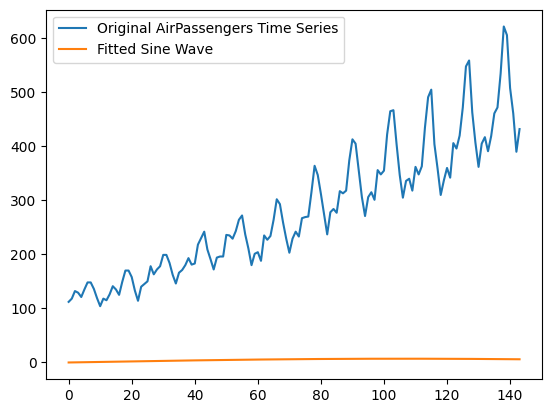

Best Parameters: [ 6.73214307 -0.01517121  3.17849086]
Best Fitness (Error): 12936158.658687117


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load the AirPassengers time series dataset
air_passengers = sm.datasets.get_rdataset('AirPassengers').data['value'].values

# Objective function to fit a sine wave
def objective_function(params, time_series):
    amplitude, frequency, phase_shift = params
    fitted_sine_wave = amplitude * np.sin(frequency * np.arange(len(time_series)) + phase_shift)
    error = np.sum((fitted_sine_wave - time_series)**2)
    return error

class Particle:
    def __init__(self, dim):
        self.position = np.random.rand(dim)  # Parameters: amplitude, frequency, phase_shift
        self.velocity = np.random.rand(dim)
        self.best_position = np.copy(self.position)
        self.fitness = float('inf')

def update_velocity(particle, global_best_position, w=0.5, c1=1.5, c2=1.5):
    inertia = w * particle.velocity
    cognitive = c1 * np.random.rand() * (particle.best_position - particle.position)
    social = c2 * np.random.rand() * (global_best_position - particle.position)
    return inertia + cognitive + social

def particle_swarm_optimization_time_series(objective_function, time_series, num_particles, num_iterations):
    dim = 3  # Number of parameters (amplitude, frequency, phase_shift)
    particles = [Particle(dim) for _ in range(num_particles)]
    global_best_position = None
    global_best_fitness = float('inf')

    for _ in range(num_iterations):
        for particle in particles:
            fitness = objective_function(particle.position, time_series)
            if fitness < particle.fitness:
                particle.fitness = fitness
                particle.best_position = np.copy(particle.position)

            if fitness < global_best_fitness:
                global_best_fitness = fitness
                global_best_position = np.copy(particle.position)

        for particle in particles:
            particle.velocity = update_velocity(particle, global_best_position)
            particle.position += particle.velocity

    return global_best_position, global_best_fitness

# Example usage:
best_params, best_fitness = particle_swarm_optimization_time_series(objective_function, air_passengers, num_particles=20, num_iterations=100)

# Plot the original time series and the fitted sine wave
plt.plot(air_passengers, label='Original AirPassengers Time Series')
fitted_sine_wave = best_params[0] * np.sin(best_params[1] * np.arange(len(air_passengers)) + best_params[2])
plt.plot(fitted_sine_wave, label='Fitted Sine Wave')
plt.legend()
plt.show()

print("Best Parameters:", best_params)
print("Best Fitness (Error):", best_fitness)


d)         Explore pyswarm, niapy, and other packages for PSO Implementation

In [4]:
!pip install pyswarm
from pyswarm import pso

# Define the objective function to minimize
def objective_function(x):
    return x[0]**2 + x[1]**2

# Define the search space bounds
lb = [-5, -5]  # lower bounds
ub = [5, 5]    # upper bounds

# Run PSO optimization
best_params, best_value = pso(objective_function, lb, ub)

print("Best Parameters:", best_params)
print("Best Value:", best_value)


Stopping search: Swarm best objective change less than 1e-08
Best Parameters: [7.69495720e-05 4.37899821e-04]
Best Value: 1.976774897004861e-07


In [5]:
pip install niapy


In [6]:
from niapy.algorithms.basic import ParticleSwarmAlgorithm
from niapy.task import Task
from niapy.problems import Sphere

# Define the optimization problem
problem = Sphere(dimension=2)

# Define the task and algorithm
task = Task(problem=problem, max_iters=1000)
algorithm = ParticleSwarmAlgorithm(population_size=20, c1=2.0, c2=2.0, w=0.7)

# Run PSO optimization
best_params = algorithm.run(task)

print("Best Parameters:", best_params[0])
print("Best Value:", best_params[1])


Best Parameters: [ 2.99074069e-28 -1.60962204e-27]
Best Value: 2.680328417328166e-54


In [7]:
pip install scipy


In [8]:
from scipy.optimize import minimize

# Define a new objective function to minimize
def objective_function(x):
    return (x[0] - 2)**2 + (x[1] + 3)**2

# Initial guess
x0 = [0, 0]

# Run PSO optimization using Scipy
result = minimize(objective_function, x0, method='Powell')

print("Best Parameters:", result.x)
print("Best Value:", result.fun)


Best Parameters: [ 2. -3.]
Best Value: 4.930380657631324e-32


e)         Apply PSO on a medical Dataset and do feature selection and obtain the result

In [9]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from pyswarm import pso

# Load breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the objective function for PSO-based feature selection
def objective_function(features, X, y):
    # Convert feature indices to a boolean mask
    mask = np.zeros(X.shape[1], dtype=bool)
    mask[features.astype(int)] = True

    # Select features
    X_selected = X[:, mask]

    # Train a classifier (Random Forest in this example)
    classifier = RandomForestClassifier(random_state=42)
    classifier.fit(X_selected, y)

    # Evaluate classifier on the test set
    y_pred = classifier.predict(X_test[:, mask])
    accuracy = accuracy_score(y_test, y_pred)

    # Minimize the negative accuracy (maximize accuracy)
    return -accuracy

# Define bounds for feature indices
lower_bound = 0
upper_bound = X.shape[1] - 1
lb = [lower_bound] * X.shape[1]
ub = [upper_bound] * X.shape[1]

# Run PSO optimization for feature selection
best_features, _ = pso(objective_function, lb=lb, ub=ub, args=(X_train, y_train), swarmsize=10, maxiter=10)

# Convert best features to a boolean mask
best_mask = np.zeros(X.shape[1], dtype=bool)
best_mask[best_features.astype(int)] = True

# Select features based on the best mask
X_train_selected = X_train[:, best_mask]
X_test_selected = X_test[:, best_mask]

# Train a classifier using the selected features
classifier_selected = RandomForestClassifier(random_state=42)
classifier_selected.fit(X_train_selected, y_train)

# Evaluate the classifier on the test set
y_pred_selected = classifier_selected.predict(X_test_selected)
accuracy_selected = accuracy_score(y_test, y_pred_selected)

# Display results
print("Selected Features:", np.where(best_mask)[0])
print("Accuracy with Feature Selection:", accuracy_selected)


Stopping search: maximum iterations reached --> 10
Selected Features: [ 0  1  4  6  8 11 13 14 15 16 18 19 20 22 23 24 25]
Accuracy with Feature Selection: 0.9912280701754386


f)          Apply PSO on the Medical Data Set and do Clustering

<ipython-input-10-70e60fa586e5>:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  k = int(k)  # Ensure k is an integer
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-10-70e60fa586e5>:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  k = int(k)  # Ensure k is an integer
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

Stopping search: maximum iterations reached --> 10


<ipython-input-10-70e60fa586e5>:43: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  best_k = int(best_k)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


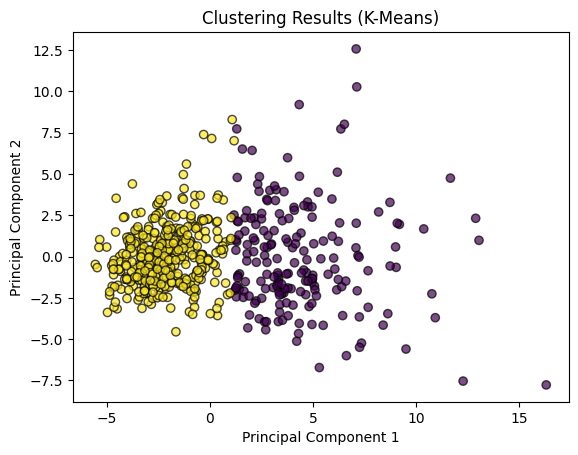

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from pyswarm import pso

# Load breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Standardize the data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Define the objective function for PSO-based clustering
def objective_function(k, X):
    k = int(k)  # Ensure k is an integer
    if k < 2:
        return np.inf

    # Perform K-Means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)

    # Calculate silhouette score (maximize)
    silhouette = silhouette_score(X, labels)
    return -silhouette

# Define bounds for the number of clusters
lower_bound = 2  # At least two clusters
upper_bound = 10  # You can adjust this based on your problem
lb = [lower_bound]
ub = [upper_bound]

# Run PSO optimization for clustering
best_k, _ = pso(objective_function, lb=lb, ub=ub, args=(X_standardized,), swarmsize=10, maxiter=10)

# Convert best k to an integer
best_k = int(best_k)

# Perform K-Means clustering with the best number of clusters
best_kmeans = KMeans(n_clusters=best_k, random_state=42)
best_labels = best_kmeans.fit_predict(X_standardized)

# Visualize the clustering using PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)

# Plot the data points with colors representing clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=best_labels, cmap='viridis', edgecolors='k', alpha=0.7)
plt.title('Clustering Results (K-Means)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()